In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

import seaborn as sns
import csv

# a)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive/laptop_price.csv"
df = pd.read_csv(path, encoding='ISO-8859-1')
df.sample(10)

Mounted at /content/drive


laptop_ID Company             Product            TypeName  Inches  \
829         838    Acer             Swift 3            Notebook    14.0   
472         479  Google     Pixelbook (Core           Ultrabook    12.3   
244         249  Lenovo      Yoga 910-13IKB  2 in 1 Convertible    13.9   
639         647    Dell              XPS 15            Notebook    15.6   
76           78  Lenovo  IdeaPad 320-15IKBN            Notebook    15.6   
1134       1149    Acer      Aspire E5-576G            Notebook    15.6   
1228       1246  Lenovo  IdeaPad Y700-15ISK              Gaming    15.6   
263         268    Dell         Vostro 3568            Notebook    15.6   
912         925  Lenovo   IdeaPad 510-15IKB            Notebook    15.6   
385         391  Lenovo         Thinkpad X1           Ultrabook    14.0   

                               ScreenResolution                          Cpu  \
829                 IPS Panel Full HD 1920x1080   Intel Core i3 7100U 2.4GHz   
472                       Touchscreen 2400x1600    Intel Core i5 7Y57 1.2GHz   
244   IPS Panel Full HD / Touchscreen 1920x1080   Intel Core i7 7500U 2.7GHz   
639         4K Ultra HD / Touchscreen 3840x2160  Intel Core i7 7700HQ 2.8GHz   
76                            Full HD 1920x1080   Intel Core i5 7200U 2.5GHz   
1134                          Full HD 1920x1080   Intel Core i5 7200U 2.5GHz   
1228  IPS Panel Full HD / Touchscreen 1920x1080  Intel Core i7 6700HQ 2.6GHz   
263                           Full HD 1920x1080   Intel Core i5 7200U 2.5GHz   
912                           Full HD 1920x1080   Intel Core i7 7500U 2.7GHz   
385                         IPS Panel 2560x1440   Intel Core i7 7500U 2.7GHz   

       Ram                Memory                      Gpu       OpSys  Weight  \
829    8GB             128GB SSD    Intel HD Graphics 620  Windows 10   1.5kg   
472    8GB             128GB SSD    Intel HD Graphics 615   Chrome OS   1.1kg   
244    8GB             256GB SSD    Intel HD Graphics 620  Windows 10  1.38kg   
639   16GB               1TB SSD  Nvidia GeForce GTX 1050  Windows 10  2.06kg   
76     8GB               2TB HDD    Intel HD Graphics 620       No OS   2.2kg   
1134   4GB               1TB HDD     Nvidia GeForce 940MX  Windows 10  2.23kg   
1228  16GB  128GB SSD +  1TB HDD  Nvidia GeForce GTX 960M  Windows 10   2.6kg   
263    4GB               1TB HDD    Intel HD Graphics 620  Windows 10  2.18kg   
912    6GB             256GB SSD     Nvidia GeForce 940MX  Windows 10   2.2kg   
385    8GB             512GB SSD    Intel HD Graphics 620  Windows 10  1.13kg   

      Price_euros  
829         619.0  
472        1275.0  
244        1079.0  
639        2399.0  
76          519.0  
1134        616.0  
1228       1029.0  
263         657.0  
912         789.0  
385        2282.0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [4]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [5]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')
df.head()

laptop_ID Company      Product   TypeName  Inches  \
0          1   Apple  MacBook Pro  Ultrabook    13.3   
1          2   Apple  Macbook Air  Ultrabook    13.3   
2          3      HP       250 G6   Notebook    15.6   
3          4   Apple  MacBook Pro  Ultrabook    15.4   
4          5   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu  Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz    8   
1                            1440x900        Intel Core i5 1.8GHz    8   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz    8   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz   16   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz    8   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS    1.37   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS    1.34   
2            256GB SSD         Intel HD Graphics 620  No OS    1.86   
3            512GB SSD            AMD Radeon Pro 455  macOS    1.83   
4            256GB SSD  Intel Iris Plus Graphics 650  macOS    1.37   

   Price_euros  
0      1339.69  
1       898.94  
2       575.00  
3      2537.45  
4      1803.60

# b)

<ipython-input-6-9e9b246a0d78>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price_euros'])


<Axes: xlabel='Price_euros', ylabel='Density'>

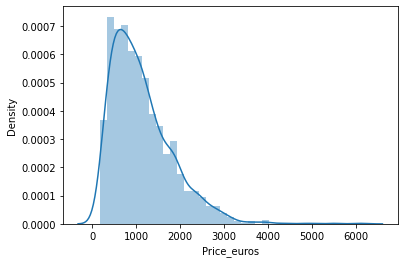

In [6]:
sns.distplot(df['Price_euros'])

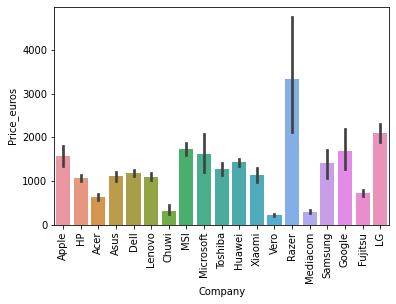

In [7]:
sns.barplot(x=df['Company'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

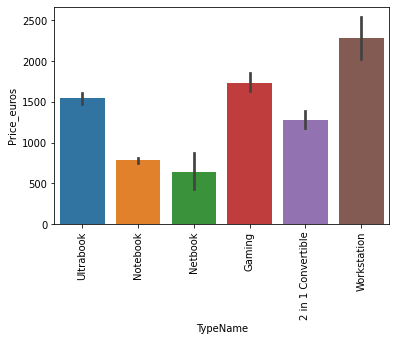

In [8]:
sns.barplot(x=df['TypeName'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Inches', ylabel='Price_euros'>

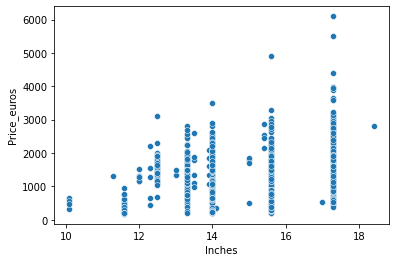

In [10]:
sns.scatterplot(x=df['Inches'],y=df['Price_euros'])

# c)

In [11]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
new = df['ScreenResolution'].str.split('x',n=1,expand=True)
df['XRes'] = new[0].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0]).astype('int')
df['YRes'] = new[1].astype('int')
df.sample(10)

laptop_ID Company                              Product  \
521         528      HP                         Spectre X360   
1172       1190    Asus  X553SA-XX021T (N3050/4GB/500GB/W10)   
720         728  Lenovo                          ThinkPad X1   
654         662      HP                               250 G6   
1094       1109      HP                        Elitebook 820   
431         438  Lenovo                          Thinkpad 13   
944         958  Lenovo                       Yoga 700-11ISK   
4             5   Apple                          MacBook Pro   
366         372    Dell                        Inspiron 5770   
1300       1318  Lenovo                   IdeaPad 100S-14IBR   

                TypeName  Inches                           ScreenResolution  \
521            Ultrabook    13.3                IPS Panel Full HD 1920x1080   
1172            Notebook    15.6                                   1366x768   
720            Ultrabook    14.0               IPS Panel Quad HD+ 2560x1440   
654             Notebook    15.6                                   1366x768   
1094             Netbook    12.5                                   1366x768   
431             Notebook    13.3                IPS Panel Full HD 1920x1080   
944   2 in 1 Convertible    11.3  IPS Panel Full HD / Touchscreen 1920x1080   
4              Ultrabook    13.3         IPS Panel Retina Display 2560x1600   
366             Notebook    17.3                          Full HD 1920x1080   
1300            Notebook    14.0                                   1366x768   

                                       Cpu  Ram                Memory  \
521             Intel Core i7 7500U 2.7GHz    8             256GB SSD   
1172  Intel Celeron Dual Core N3050 1.6GHz    4             500GB HDD   
720             Intel Core i7 6500U 2.5GHz    8             512GB SSD   
654               Intel Core i3 6006U 2GHz    4             500GB HDD   
1094            Intel Core i5 6200U 2.3GHz    4             128GB SSD   
431             Intel Core i7 7500U 2.7GHz    8             256GB SSD   
944            Intel Core M m7-6Y75 1.2GHz    8             256GB SSD   
4                     Intel Core i5 3.1GHz    8             256GB SSD   
366             Intel Core i5 8250U 1.6GHz    8  128GB SSD +  1TB HDD   
1300  Intel Celeron Dual Core N3050 1.6GHz    2    64GB Flash Storage   

                               Gpu       OpSys  Weight  Price_euros  \
521          Intel HD Graphics 620  Windows 10    1.32      1399.00   
1172             Intel HD Graphics  Windows 10    2.20       369.00   
720          Intel HD Graphics 520  Windows 10    1.17      1686.64   
654          Intel HD Graphics 520       No OS    1.86       364.90   
1094         Intel HD Graphics 520   Windows 7    2.40      1599.00   
431          Intel HD Graphics 620  Windows 10    1.40      1010.00   
944          Intel HD Graphics 515  Windows 10    1.10      1299.00   
4     Intel Iris Plus Graphics 650       macOS    1.37      1803.60   
366                 AMD Radeon 530  Windows 10    2.80      1085.00   
1300             Intel HD Graphics  Windows 10    1.50       229.00   

      Touchscreen  Ips  XRes  YRes  
521             0    1  1920  1080  
1172            0    0  1366   768  
720             0    1  2560  1440  
654             0    0  1366   768  
1094            0    0  1366   768  
431             0    1  1920  1080  
944             1    1  1920  1080  
4               0    1  2560  1600  
366             0    0  1920  1080  
1300            0    0  1366   768

In [12]:
df['ppi'] = (((df['XRes']**2) + (df['YRes']**2))**0.5/df['Inches']).astype('float')
df.drop(columns=['XRes','YRes'],inplace=True)

In [ ]:
df.corr()['Price_euros']

laptop_ID      0.067830
Inches         0.068197
Ram            0.743007
Weight         0.210370
Price_euros    1.000000
Touchscreen    0.191226
Ips            0.252208
ppi            0.473487
Name: Price_euros, dtype: float64

In [13]:
df.drop(columns=['laptop_ID','ScreenResolution','Inches','Product'],inplace=True)
df['CpuName'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
df.sample(5)

Company  TypeName                          Cpu  Ram              Memory  \
54      Acer  Notebook   Intel Core i3 7100U 2.4GHz    4             1TB HDD   
184   Xiaomi  Notebook   Intel Core i5 8250U 1.6GHz    8           256GB SSD   
896     Dell    Gaming  Intel Core i7 7700HQ 2.8GHz    8             1TB HDD   
1041    Vero  Notebook  Intel Atom X5-Z8350 1.44GHz    2  32GB Flash Storage   
176     Acer  Notebook     Intel Core i3 6006U 2GHz    4           128GB SSD   

                            Gpu       OpSys  Weight  Price_euros  Touchscreen  \
54        Intel HD Graphics 620  Windows 10    2.40        384.0            0   
184        Nvidia GeForce MX150       No OS    1.95       1199.0            0   
896   Nvidia GeForce GTX 1050Ti       Linux    2.62        929.0            0   
1041      Intel HD Graphics 400  Windows 10    1.45        210.8            0   
176       Intel HD Graphics 520  Windows 10    2.10        449.0            0   

      Ips         ppi              CpuName  
54      0  100.454670        Intel Core i3  
184     1  141.211998        Intel Core i5  
896     0  141.211998        Intel Core i7  
1041    0  111.935204  Intel Atom X5-Z8350  
176     0  100.454670        Intel Core i3

In [14]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
df['CpuBrand'] = df['CpuName'].apply(fetch_processor)
df.drop(columns=['Cpu','CpuName'],inplace=True)
df.sample(5)

Company  TypeName  Ram                Memory                      Gpu  \
359      Dell  Notebook    8             256GB SSD    Intel HD Graphics 620   
851      Asus    Gaming   16  128GB SSD +  1TB HDD  Nvidia GeForce GTX 1060   
575  Mediacom  Notebook    4              32GB SSD        Intel HD Graphics   
281      Dell  Notebook    4               1TB HDD       AMD Radeon R5 M430   
543      Acer    Gaming    8               1TB HDD  Nvidia GeForce GTX 1050   

          OpSys  Weight  Price_euros  Touchscreen  Ips         ppi  \
359  Windows 10    1.36       1427.0            0    0  157.350512   
851  Windows 10    2.10       1899.0            0    0  141.211998   
575  Windows 10    1.40        249.0            0    0  157.350512   
281       Linux    2.25        428.0            0    0  141.211998   
543       Linux    2.40        798.0            0    0  141.211998   

                  CpuBrand  
359          Intel Core i5  
851          Intel Core i7  
575  Other Intel Processor  
281          Intel Core i3  
543          Intel Core i5

In [15]:
df.corr()['Price_euros']

Ram            0.743007
Weight         0.210370
Price_euros    1.000000
Touchscreen    0.191226
Ips            0.252208
ppi            0.473487
Name: Price_euros, dtype: float64

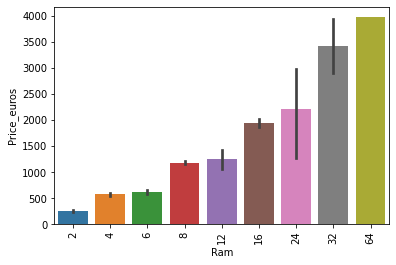

In [16]:
sns.barplot(x=df['Ram'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [17]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [18]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["Mem1"]=new[0].str.strip()

df["Mem2"]= new[1]

df["HDD1"] = df["Mem1"].apply(lambda x: 1 if "HDD" in x else 0)
df["SSD1"] = df["Mem1"].apply(lambda x: 1 if "SSD" in x else 0)
df["Hybrid1"] = df["Mem1"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Flash_Storage1"] = df["Mem1"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['Mem1'] = df['Mem1'].str.replace(r'\D', '').astype(int)

df["Mem2"].fillna("0", inplace = True)

df["HDD2"] = df["Mem2"].apply(lambda x: 1 if "HDD" in x else 0)
df["SSD2"] = df["Mem2"].apply(lambda x: 1 if "SSD" in x else 0)
df["Hybrid2"] = df["Mem2"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Flash_Storage2"] = df["Mem2"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['Mem2'] = df['Mem2'].str.replace(r'\D', '').astype(int)


df["HDD"]=(df["Mem1"]*df["HDD1"]+df["Mem2"]*df["HDD2"])
df["SSD"]=(df["Mem1"]*df["SSD1"]+df["Mem2"]*df["SSD2"])
df["Hybrid"]=(df["Mem1"]*df["Hybrid1"]+df["Mem2"]*df["Hybrid2"])
df["Flash_Storage"]=(df["Mem1"]*df["Flash_Storage1"]+df["Mem2"]*df["Flash_Storage2"])

df.drop(columns=['Mem1', 'Mem2', 'HDD1', 'SSD1', 'Hybrid1',
       'Flash_Storage1', 'HDD2', 'SSD2', 'Hybrid2',
       'Flash_Storage2'],inplace=True)
df.drop(columns=['Memory'],inplace=True)
df.sample(5)

<ipython-input-18-cbbd46f01046>:15: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Mem1'] = df['Mem1'].str.replace(r'\D', '').astype(int)
<ipython-input-18-cbbd46f01046>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Mem2'] = df['Mem2'].str.replace(r'\D', '').astype(int)


Company   TypeName  Ram                    Gpu       OpSys  Weight  \
718   Mediacom   Notebook    4  Intel HD Graphics 400  Windows 10    1.40   
1060        HP   Notebook    8  Intel HD Graphics 620  Windows 10    2.04   
499     Lenovo   Notebook    8  Intel HD Graphics 620  Windows 10    2.30   
1072        HP  Ultrabook    8  Intel HD Graphics 520   Windows 7    1.26   
272       Dell   Notebook    8         AMD Radeon 520       Linux    2.14   

      Price_euros  Touchscreen  Ips         ppi               CpuBrand  HDD  \
718        265.00            0    1  161.725391  Other Intel Processor   32   
1060      1070.00            0    0  141.211998          Intel Core i7    0   
499        911.00            0    1  141.211998          Intel Core i5    0   
1072      1199.00            0    0  176.232574          Intel Core i5    0   
272        735.07            0    0  141.211998          Intel Core i7    0   

      SSD  Hybrid  Flash_Storage  
718     0       0              0  
1060  256       0              0  
499   256       0              0  
1072  256       0              0  
272   256       0              0

In [19]:
df.corr()['Price_euros']

Ram              0.743007
Weight           0.210370
Price_euros      1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price_euros, dtype: float64

In [20]:
df.drop(columns=['Hybrid', 'Flash_Storage'],inplace=True)

In [21]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [22]:
df['GpuBrand'] = df['Gpu'].apply(lambda x:x.split()[0])
df.drop(columns=['Gpu'],inplace=True)
df.sample(10)

Company            TypeName  Ram       OpSys  Weight  Price_euros  \
1017  Lenovo            Notebook   16   Windows 7    2.40      2968.00   
318       HP            Notebook    8  Windows 10    1.95       980.00   
1016      HP            Notebook    4  Windows 10    2.04       769.99   
1124    Asus            Notebook    4  Windows 10    2.00       435.00   
1133      HP           Ultrabook    8  Windows 10    1.84       752.00   
649   Lenovo           Ultrabook    8  Windows 10    1.36      1584.00   
168     Acer            Notebook    8  Windows 10    3.00       854.00   
807       HP            Notebook    8  Windows 10    2.04       629.00   
118     Asus            Notebook    4  Windows 10    2.00       564.00   
374     Dell  2 in 1 Convertible    8  Windows 10    1.62       869.01   

      Touchscreen  Ips         ppi       CpuBrand   HDD  SSD GpuBrand  
1017            0    1  254.671349  Intel Core i7     0  512   Nvidia  
318             0    0  157.350512  Intel Core i5     0  256    Intel  
1016            0    0  100.454670  Intel Core i3     0  256    Intel  
1124            0    0  100.454670  Intel Core i3  1000    0    Intel  
1133            0    0  141.211998  Intel Core i7     0  256    Intel  
649             0    1  176.232574  Intel Core i7     0  256    Intel  
168             0    1  127.335675  Intel Core i5     0  256   Nvidia  
807             0    0  100.454670  AMD Processor  2000    0      AMD  
118             0    0  127.335675  Intel Core i3  1000    0   Nvidia  
374             1    0  165.632118  Intel Core i7     0  256    Intel

In [23]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [24]:
def catOs(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'
    
df['os'] = df['OpSys'].apply(catOs)
df.drop(columns=['OpSys'],inplace=True)
df.sample(5)

Company   TypeName  Ram  Weight  Price_euros  Touchscreen  Ips  \
1200    Dell   Notebook    4    2.30        499.0            0    0   
218     Dell  Ultrabook    8    1.60       1149.0            0    0   
546   Lenovo   Notebook    4    1.87        785.0            0    0   
845     Dell   Notebook    4    2.18        739.0            0    0   
1060      HP   Notebook    8    2.04       1070.0            0    0   

             ppi       CpuBrand  HDD  SSD GpuBrand       os  
1200  100.454670  Intel Core i3    0  128      AMD  Windows  
218   157.350512  Intel Core i5    0  256    Intel  Windows  
546   157.350512  Intel Core i5  500    0    Intel  Windows  
845   141.211998  Intel Core i7    0  256      AMD  Windows  
1060  141.211998  Intel Core i7    0  256    Intel  Windows

d)

In [25]:
X = df.drop(columns=['Price_euros'])
y = np.log(df['Price_euros'])

In [26]:
ct = ColumnTransformer([
    ('scaling',StandardScaler(),['Ram','Weight','ppi','HDD','SSD']),
    ('encoding',OneHotEncoder(),['os','GpuBrand','CpuBrand','TypeName','Company'])
    ])
x_transformed = ct.fit_transform(X)

In [27]:
x_train_val,x_test,y_train_val,y_test = train_test_split(x_transformed,y,test_size=0.2,random_state=42)
x_train,x_val,y_train,y_val = train_test_split(x_train_val,y_train_val,test_size=0.2,random_state=42)

e)

In [28]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)

In [29]:
degrees = [1,2,3,4,5]
mse=[]
from sklearn.linear_model import Ridge
for degree in degrees:
    poly = PolynomialFeatures(degree)
    x_train_poly = poly.fit_transform(x_train_val)
    scores = cross_val_score(LinearRegression(), x_train_poly, y_train_val, scoring='neg_mean_squared_error',cv=kf)
    mse.append(-1*np.mean(scores))

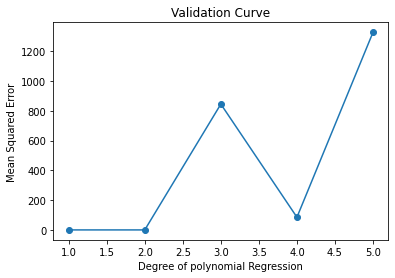

In [30]:
plt.plot(degrees,mse,'-o')
plt.xlabel('Degree of polynomial Regression')
plt.ylabel('Mean Squared Error')
plt.title('Validation Curve')
plt.show()

In [31]:
best_degree = degrees[np.argmin(mse)]
best_degree

1

f)

In [32]:
poly = PolynomialFeatures(degree = best_degree)
x_train_poly = poly.fit_transform(x_train)
x_val_poly = poly.transform(x_val)
x_train_val_poly = poly.fit_transform(x_train_val)
model = LinearRegression()
model.fit(x_train_val_poly,y_train_val)

LinearRegression()

In [33]:
import sklearn.metrics as metrics
x_test_poly = poly.transform(x_test)
y_test_pred = model.predict(x_test_poly)
mse = metrics.mean_squared_error(y_test, y_test_pred) 
r2 = metrics.r2_score(y_test, y_test_pred)
print('MSE on test data:', mse)
print('R2 on test data:', r2)

MSE on test data: 0.061380194187830764
R2 on test data: 0.8268167810990916
